In [2]:
import pandas as pd

In [1]:

import os
import matplotlib.pyplot as plt
import numpy as np

# Ensure directory exists
os.makedirs("result_images", exist_ok=True)

def plot_metrics(df, x_col, name, is_categorical=False, x_label=None, sort_col=None, xlog=False, sample_size_line_plot=False, file_name=None, withmetrics=True):
    """
    Generates a combined plot for:
    1. Average Delay (Left Axis)
    2. Cancellation Rate (Left Axis, scaled to %)
    3. Sample Size (Right Axis)
    """
    if sort_col:
        df = df.sort_values(sort_col)
    elif is_categorical and hasattr(df[x_col], 'cat'):
         pass
    else:
        if not is_categorical:
            df = df.sort_values(x_col)

    plt.rcParams.update({'font.size': 14})

    fig, ax1 = plt.subplots(figsize=(14, 8))

    ax2 = ax1.twinx()
    color_sample = 'tab:orange'
    color_delay = 'tab:blue'
    color_cancel = 'tab:red'

    cancel_data = df['cancellation_rate'] * 100

    if is_categorical:
        x_indices = np.arange(len(df))
        width = 0.25

        # Plot bars side-by-side
        # Left: Delay, Middle: Cancellation, Right: Sample Size
        ax1.bar(x_indices - width, df['avg_delay'], width=width, color=color_delay, alpha=0.8, label='Avg Delay (min)')
        ax1.bar(x_indices, cancel_data, width=width, color=color_cancel, alpha=0.8, label='Cancellation Rate (%)')
        ax2.bar(x_indices + width, df['sample_size'], width=width, color=color_sample, alpha=0.6, label='Sample Size')

        ax1.set_xticks(x_indices)
        ax1.set_xticklabels(df[x_col], rotation=45, ha='right')
    else:
        if xlog:
            ax1.set_xscale('log')
        if withmetrics:

            # Sample Size (Right Axis)
            if sample_size_line_plot:
                ax2.plot(df[x_col], df['sample_size'], color=color_sample, alpha=0.6, linestyle='--', linewidth=2, label='Sample Size')
            else:
                ax2.bar(df[x_col], df['sample_size'], color=color_sample, alpha=0.3, label='Sample Size')

            # Metrics (Left Axis)
            ax1.plot(df[x_col], df['avg_delay'], color=color_delay, marker='o', linewidth=3, label='Avg Delay (min)')
            ax1.plot(df[x_col], cancel_data, color=color_cancel, marker='X', linewidth=3, label='Cancellation Rate (%)')

    # Configure axes
    ax2.set_ylabel('Sample Size', color=color_sample, fontsize=16)
    ax2.tick_params(axis='y', labelcolor=color_sample, labelsize=14)
    ax2.grid(False)

    ax1.set_xlabel(x_label if x_label else x_col, fontsize=16)
    ax1.set_ylabel('Delay (min) / Cancellation Rate (%)', fontsize=16)
    ax1.tick_params(axis='both', labelsize=14)

    # Combined Legend
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize=14, framealpha=0.9)

    plt.title(f'{name}: Delay, Cancellation & Sample Size', fontsize=18)
    plt.tight_layout()
    if file_name:
        plt.savefig(f"result_images/{file_name}", dpi=300)
    else:
        plt.savefig(f"result_images/{name.lower().replace(' ', '_')}.png", dpi=300)
    plt.show()
    plt.close()


In [3]:
temperature_delay = pd.read_parquet("../../../aggregated_data/temperature_delay.parquet")
temperature_delay.columns

Index(['temp_bin', 'avg_delay', 'cancellation_rate', 'sample_size'], dtype='object')

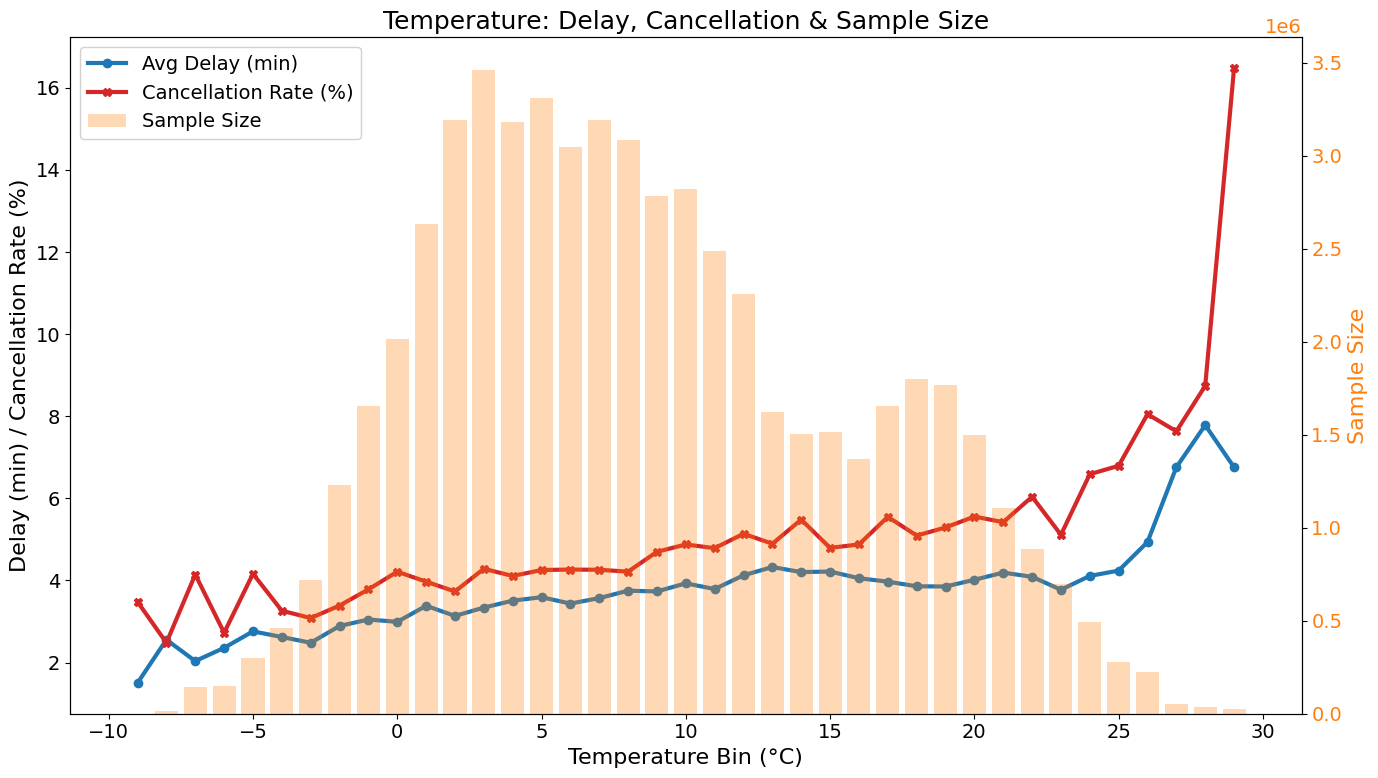

In [4]:
plot_metrics(temperature_delay, 'temp_bin', 'Temperature', is_categorical=False, x_label='Temperature Bin (°C)')

In [5]:
temp_diff = pd.read_parquet("../../../aggregated_data/temp_diff_delay.parquet")
temp_diff.columns

Index(['temp_diff_bin', 'avg_delay', 'cancellation_rate', 'sample_size'], dtype='object')

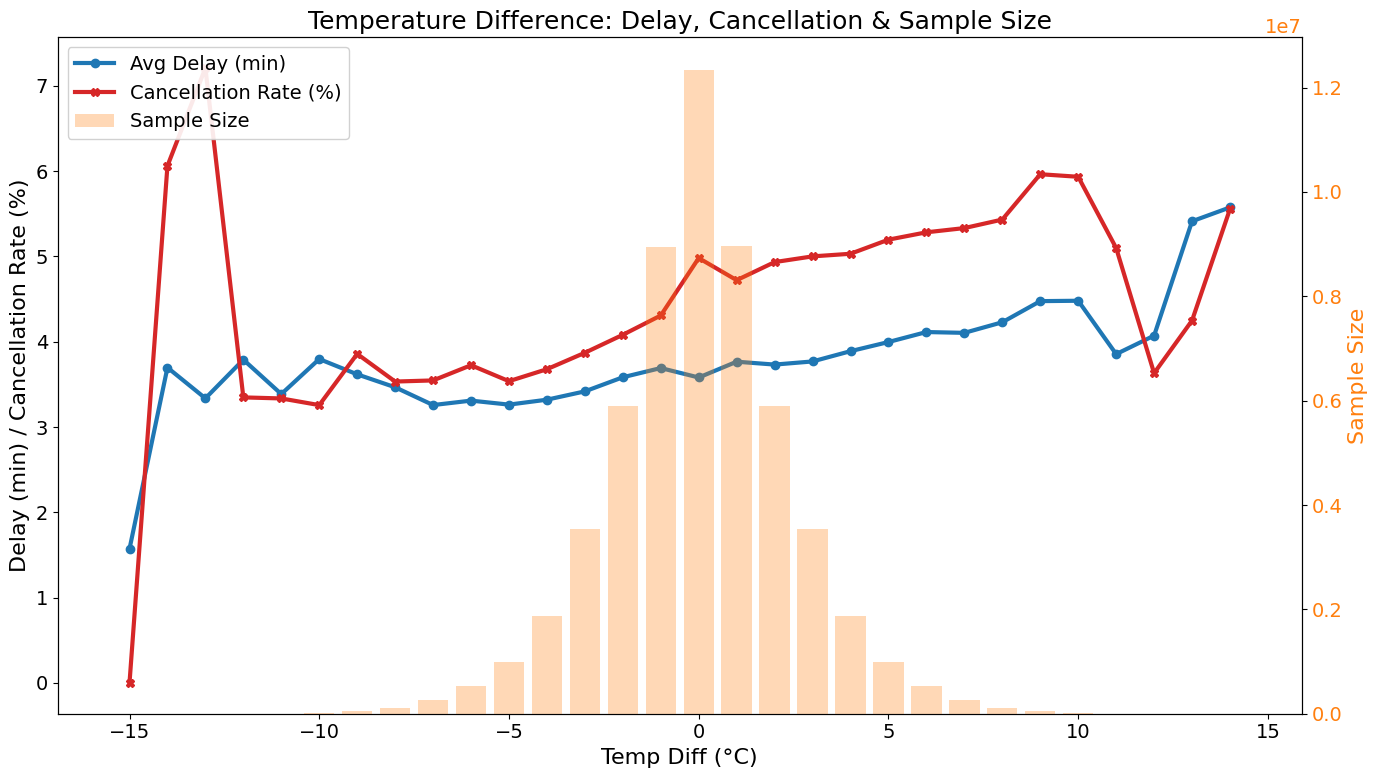

In [6]:
plot_metrics(temp_diff, 'temp_diff_bin', 'Temperature Difference', is_categorical=False, x_label='Temp Diff (°C)')

Index(['temp_diff_3day_bin', 'avg_delay', 'cancellation_rate', 'sample_size'], dtype='object')


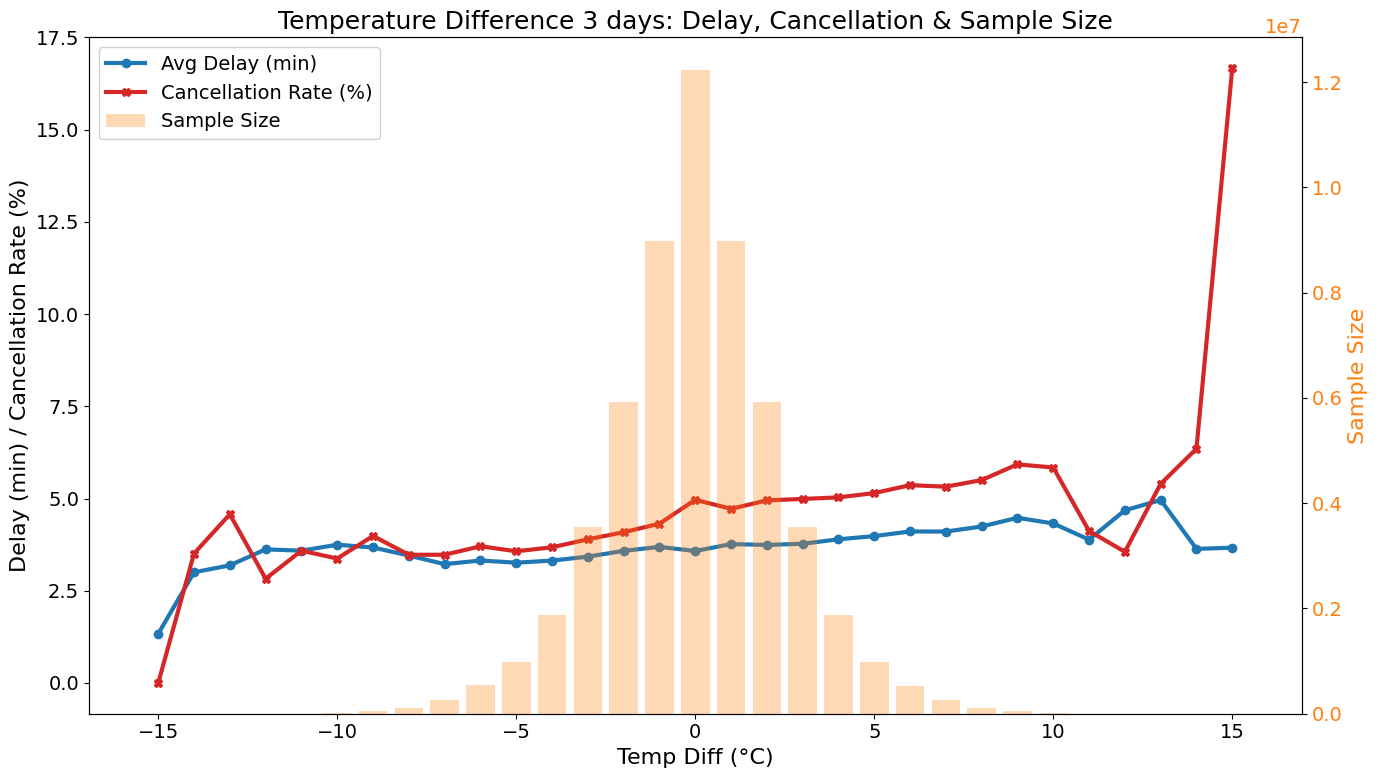

In [7]:
temp_diff_3_days = pd.read_parquet("../../../aggregated_data/temp_diff_3day_delay.parquet")
print(temp_diff_3_days.columns)
plot_metrics(temp_diff_3_days, 'temp_diff_3day_bin', 'Temperature Difference 3 days', is_categorical=False, x_label='Temp Diff (°C)')

In [8]:
train_type = pd.read_parquet("../../../aggregated_data/train_type_delay.parquet")
train_type.columns

Index(['train_type', 'avg_delay', 'cancellation_rate', 'sample_size'], dtype='object')

In [9]:
train_type = train_type.sort_values(by='sample_size', ascending=False).head(5)

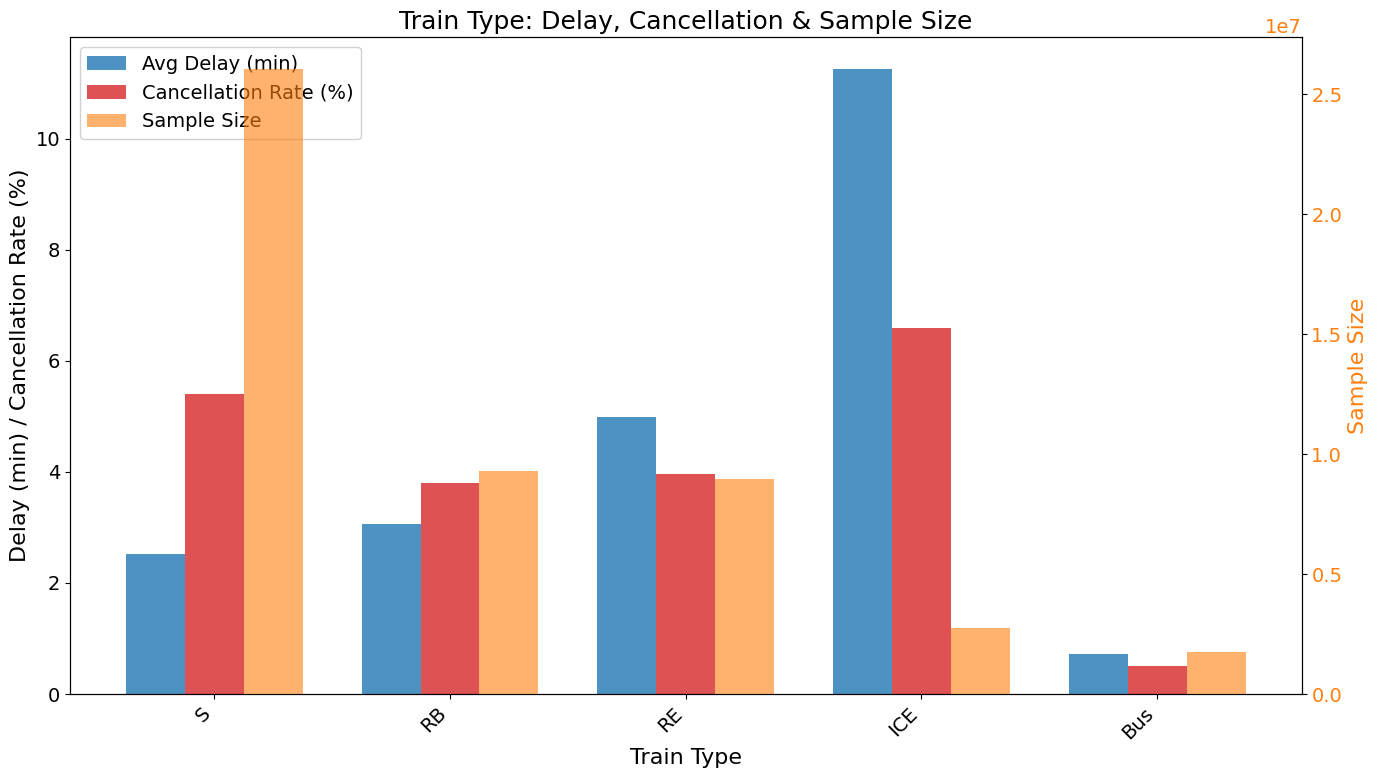

In [10]:
plot_metrics(train_type, 'train_type', 'Train Type', is_categorical=True, x_label='Train Type')

In [11]:
# filter for most common train types
train_type = train_type.sort_values(by='sample_size', ascending=False).head(n=5)
train_type

,train_type,avg_delay,cancellation_rate,sample_size
74,S,2.519412,0.053927,26065858
61,RB,3.062174,0.038054,9291552
64,RE,4.982252,0.039631,8976597
39,ICE,11.258972,0.065943,2761828
10,Bus,0.721175,0.005002,1767072


In [12]:
day_of_week_delay = pd.read_parquet("../../../aggregated_data/day_of_week_delay.parquet")
print(f"Loaded day_of_week_delay with {len(day_of_week_delay)} rows")
print(day_of_week_delay.head())

Loaded day_of_week_delay with 7 rows
  day_of_week  avg_delay  cancellation_rate  sample_size
0         Fri   3.883406           0.047157      8821442
1         Mon   3.763950           0.048732      9429108
2         Sat   3.168327           0.040942      7784912
3         Sun   2.773288           0.037931      7187519
4         Thu   3.911262           0.046346      8761603


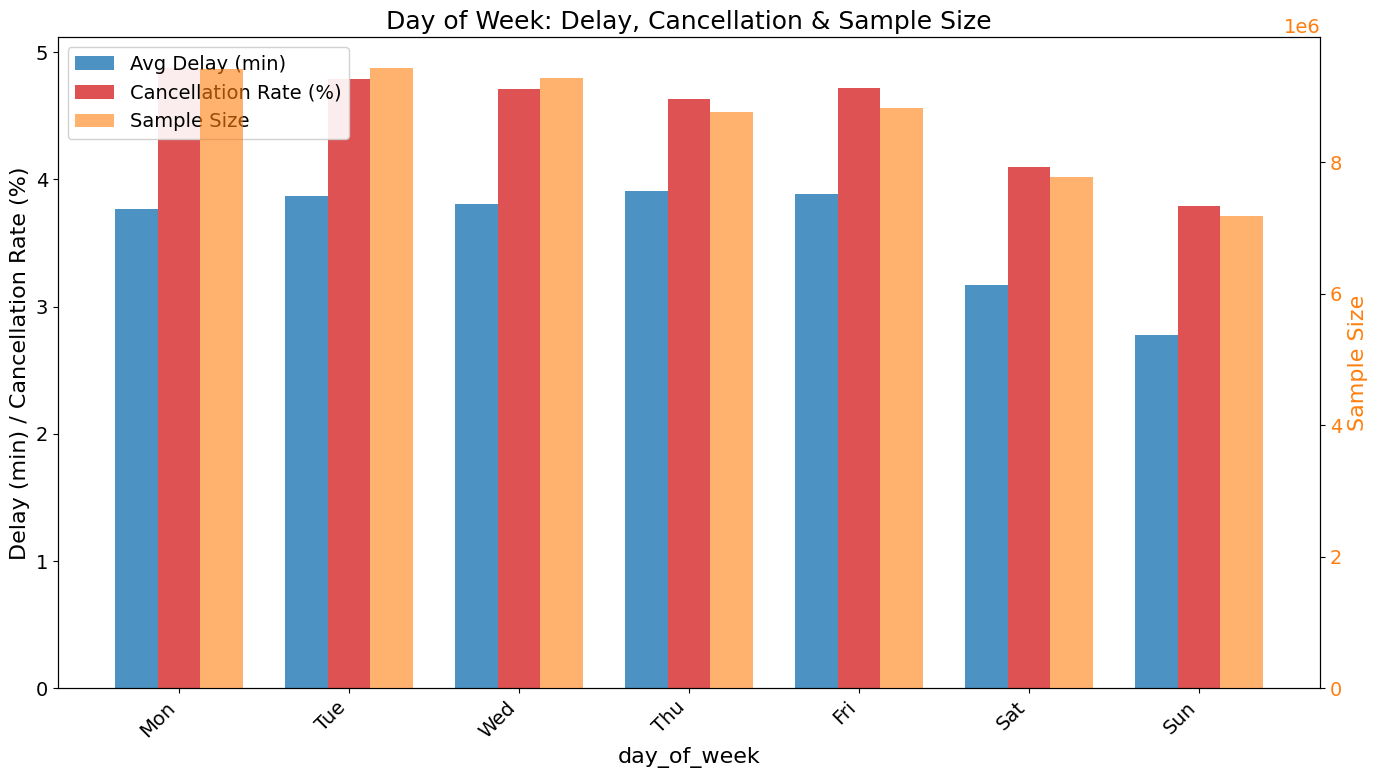

In [13]:
days = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
day_of_week_delay['day_of_week'] = pd.Categorical(day_of_week_delay['day_of_week'], categories=days, ordered=True)
plot_metrics(day_of_week_delay, 'day_of_week', 'Day of Week', is_categorical=True, sort_col='day_of_week')

In [14]:
time_of_day_delay = pd.read_parquet("../../../aggregated_data/time_of_day_delay.parquet")
print(f"Loaded time_of_day_delay with {len(time_of_day_delay)} rows")
print(time_of_day_delay.head())

Loaded time_of_day_delay with 24 rows
   hour_of_day  avg_delay  cancellation_rate  sample_size
0            0   4.243135           0.037213      1413043
1            1   5.332274           0.035734       668608
2            2   5.481791           0.037721       301529
3            3   3.734102           0.036732       287189
4            4   1.663346           0.028891       913482


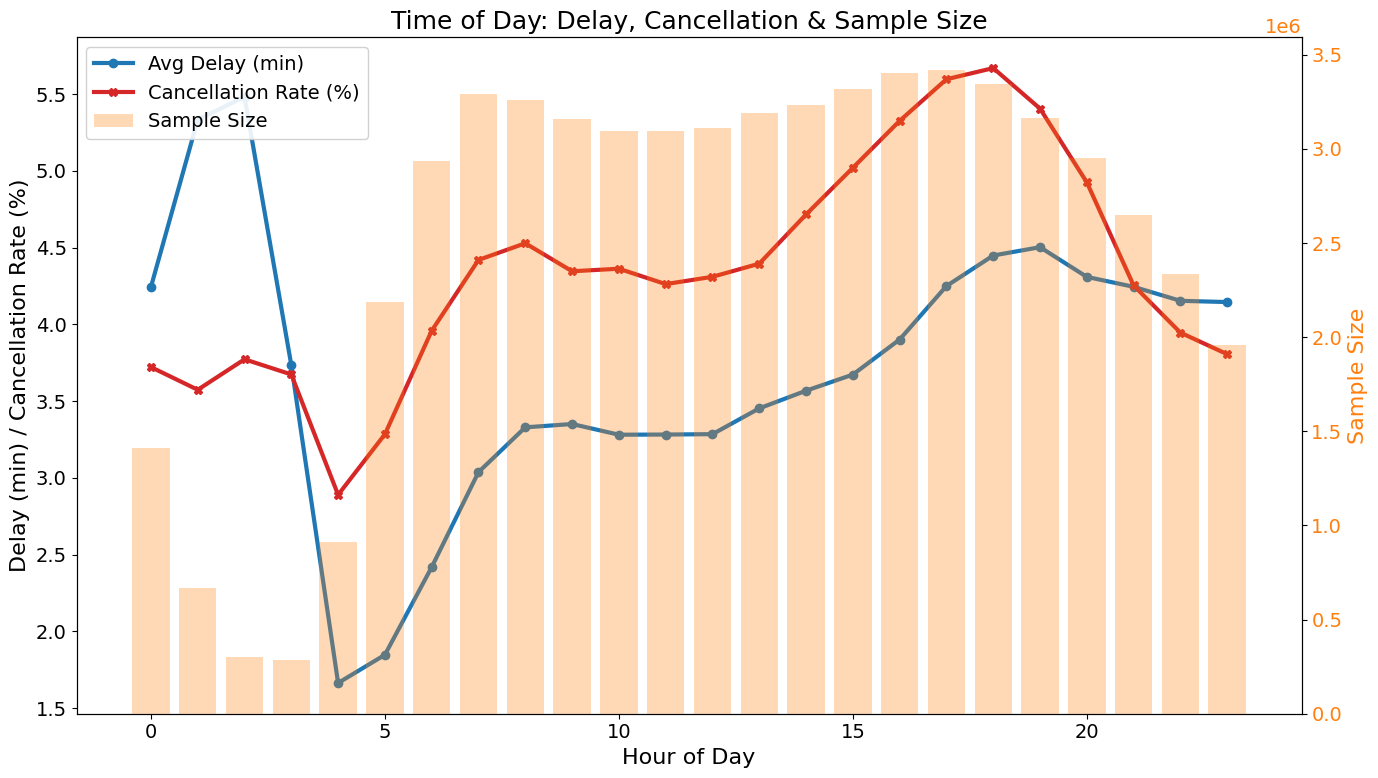

In [15]:
plot_metrics(time_of_day_delay, 'hour_of_day', 'Time of Day', is_categorical=False, x_label='Hour of Day')

In [105]:
traffic_density_delays = pd.read_parquet("../../../aggregated_data/traffic_density_delays.parquet")
print(f"Loaded traffic_density_delays with {len(traffic_density_delays)} rows")
# filter if sample_size > 100
traffic_density_delays = traffic_density_delays[traffic_density_delays['sample_size'] > 100]
print(traffic_density_delays.head())


Loaded traffic_density_delays with 52 rows
   train_count_bin  avg_delay  cancellation_rate  sample_size
3       125.892541   3.714859           0.068273          249
4       141.253754   8.457607           0.054007         3444
5       158.489319   9.692500           0.042778        17626
6       177.827941  11.294995           0.043892        30370
7       199.526231   8.062567           0.044199        32829


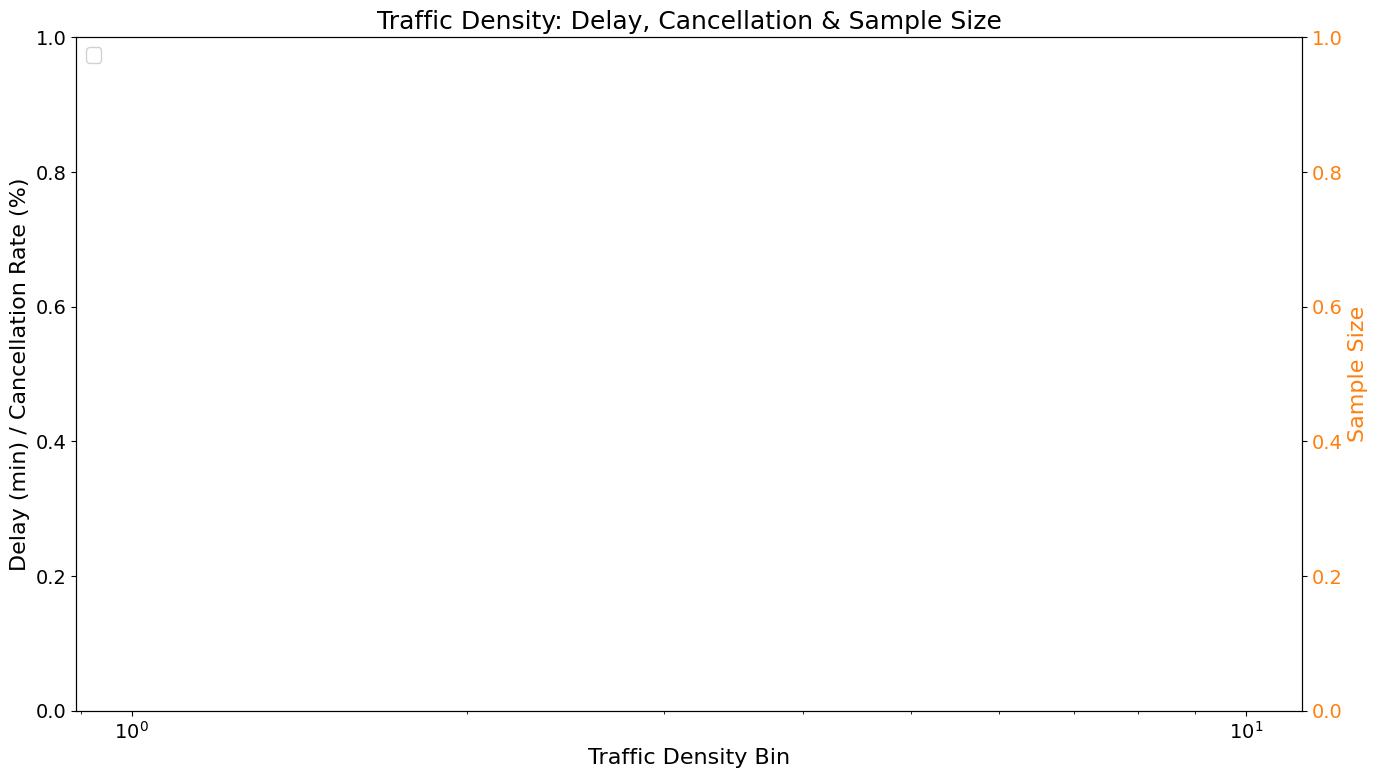

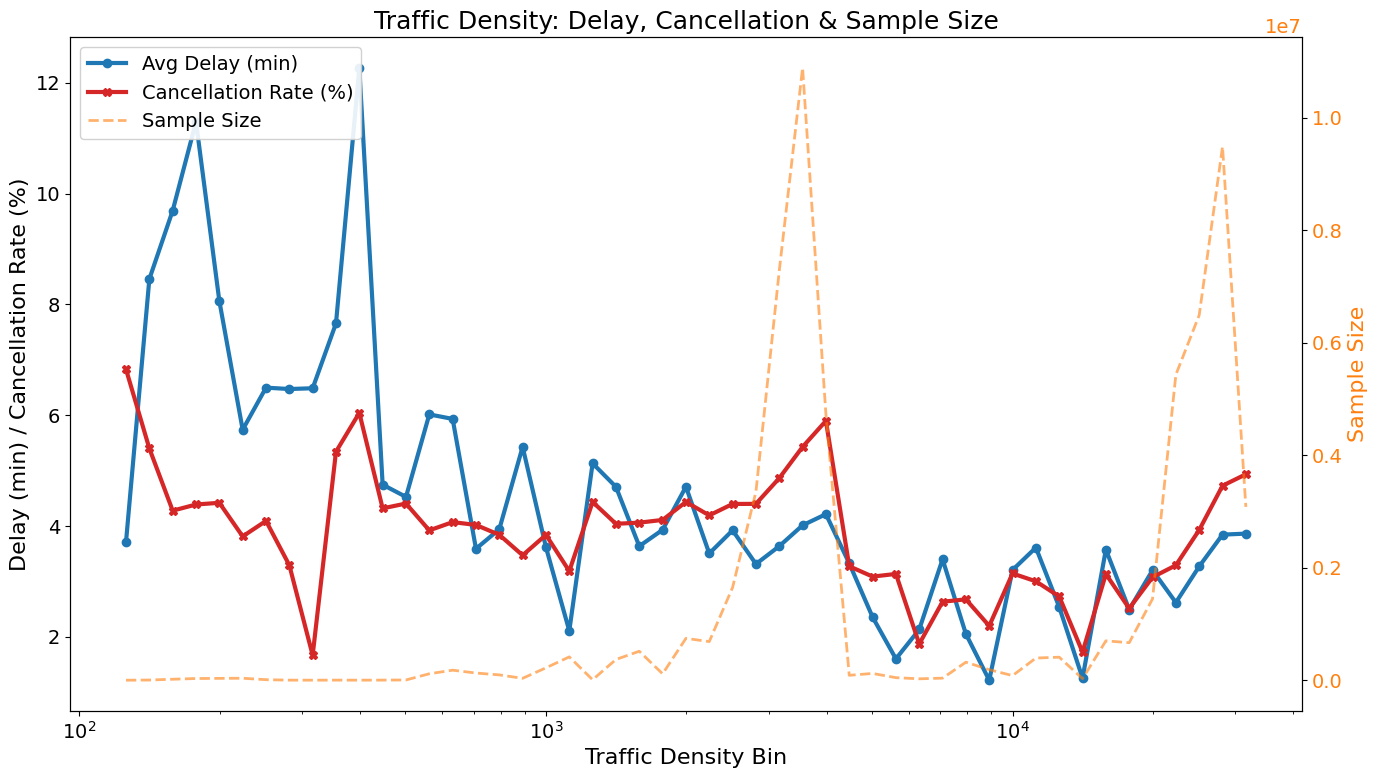

In [118]:
# without data for presentation
plot_metrics(traffic_density_delays, 'train_count_bin', 'Traffic Density', is_categorical=False, x_label='Traffic Density Bin', xlog=True, sample_size_line_plot=True, withmetrics=False, file_name='traffic_density_no_metric.png')
# with data
plot_metrics(traffic_density_delays, 'train_count_bin', 'Traffic Density', is_categorical=False, x_label='Traffic Density Bin', xlog=True, sample_size_line_plot=True)

In [107]:
temperature_delay_by_train_type = pd.read_parquet("../../../aggregated_data/temperature_delay_by_train_type.parquet")
print(f"Loaded temperature_delay_by_train_type with {len(temperature_delay_by_train_type)} rows")
print(temperature_delay_by_train_type.head())

Loaded temperature_delay_by_train_type with 2584 rows
   temp_bin train_type  avg_delay  cancellation_rate  sample_size
0       NaN        ABR   3.428571           0.023810           42
1       NaN        AKN   1.314869           0.058749         7149
2       NaN        ARV   4.210659           0.034188         1989
3       NaN        AVG   1.486111           0.006944          288
4       NaN        BOB   2.216564           0.028292         1944


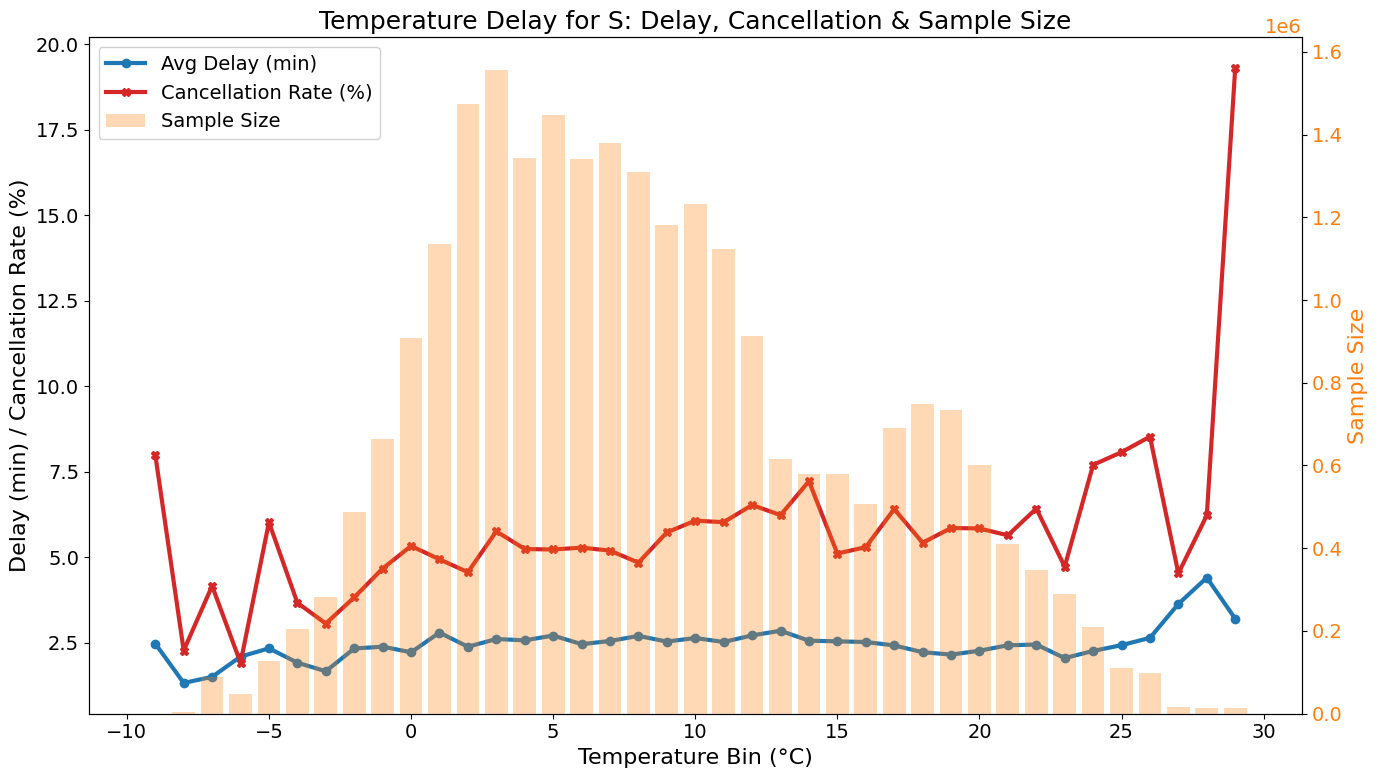

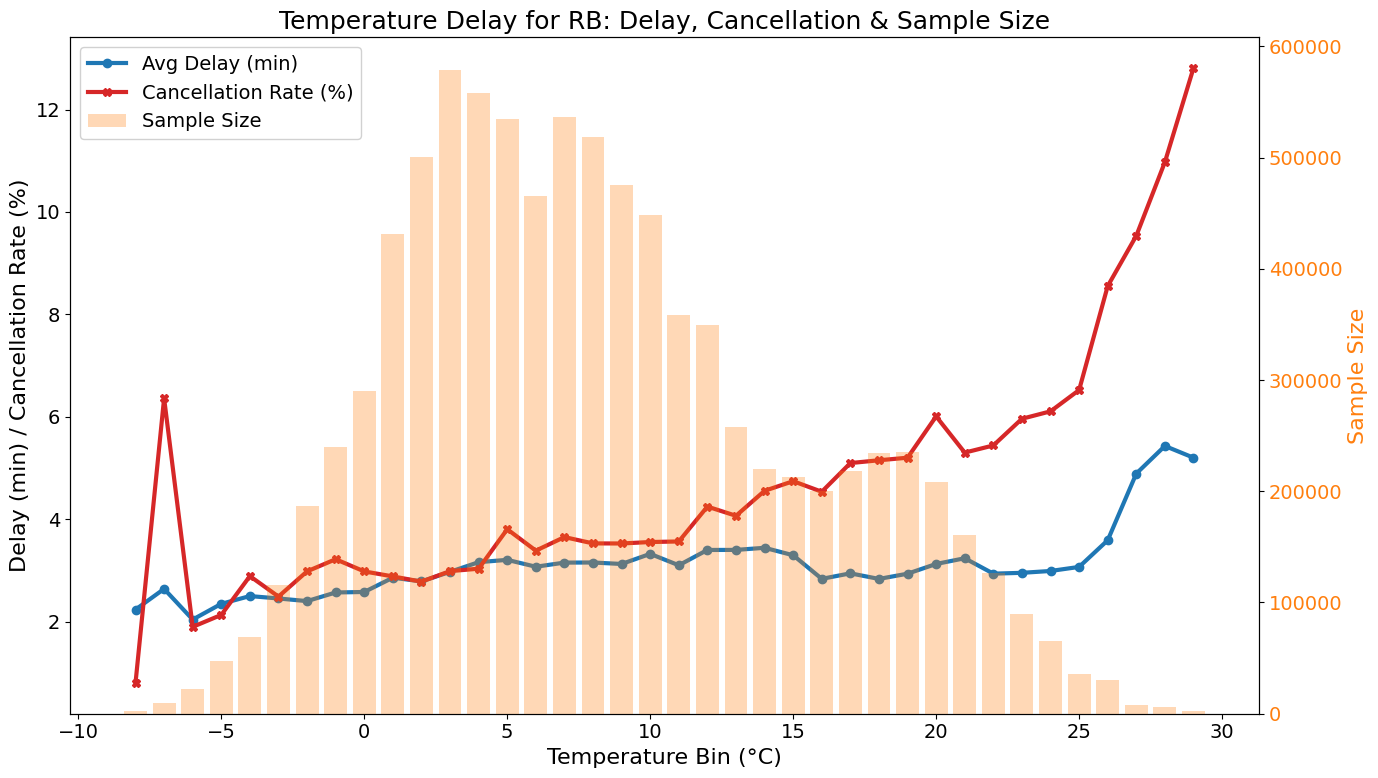

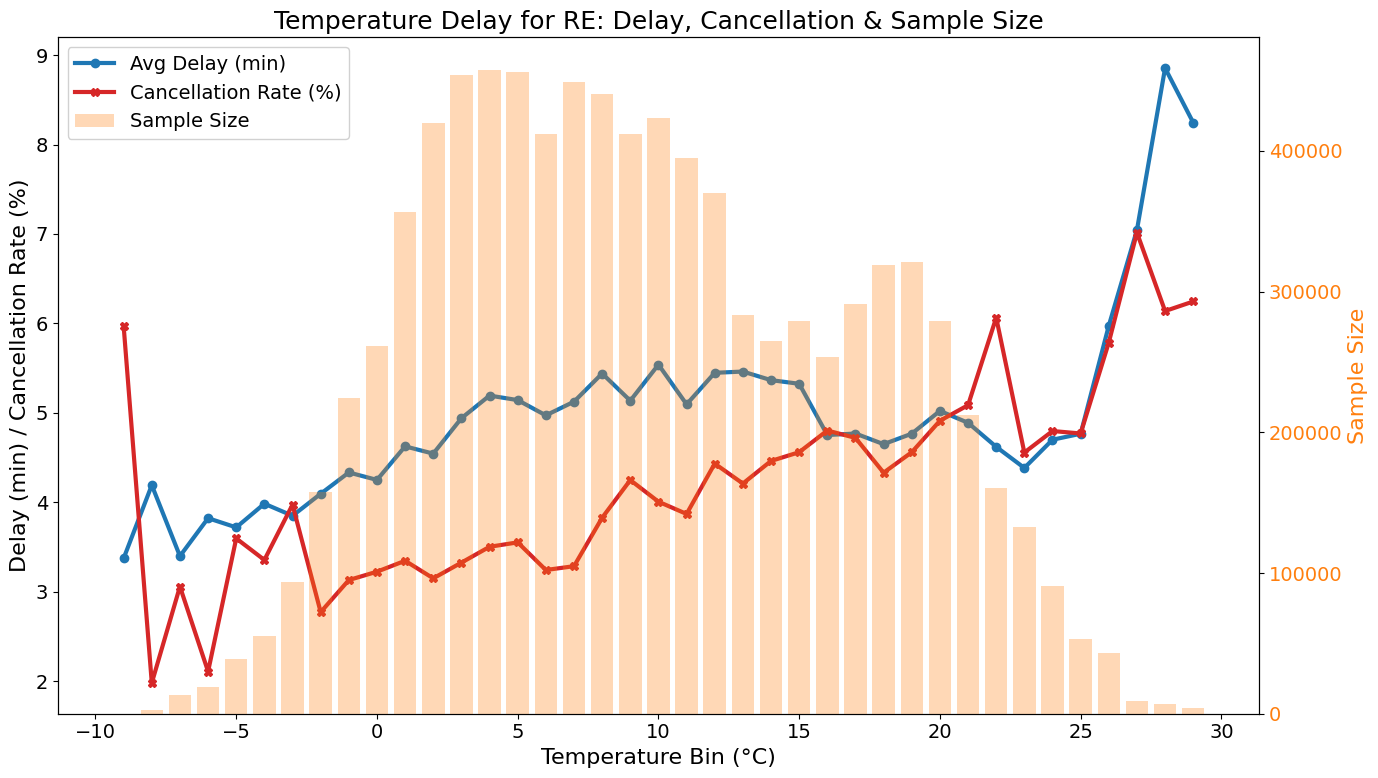

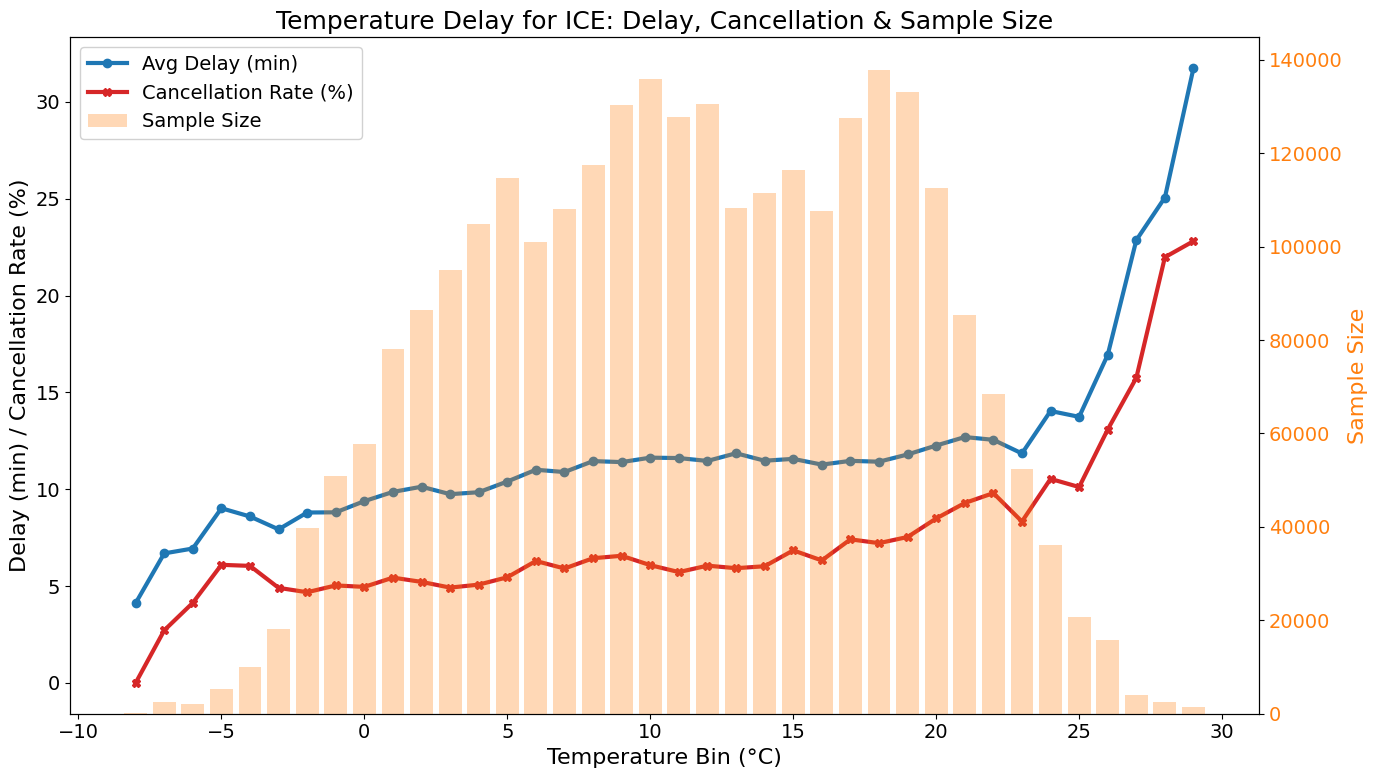

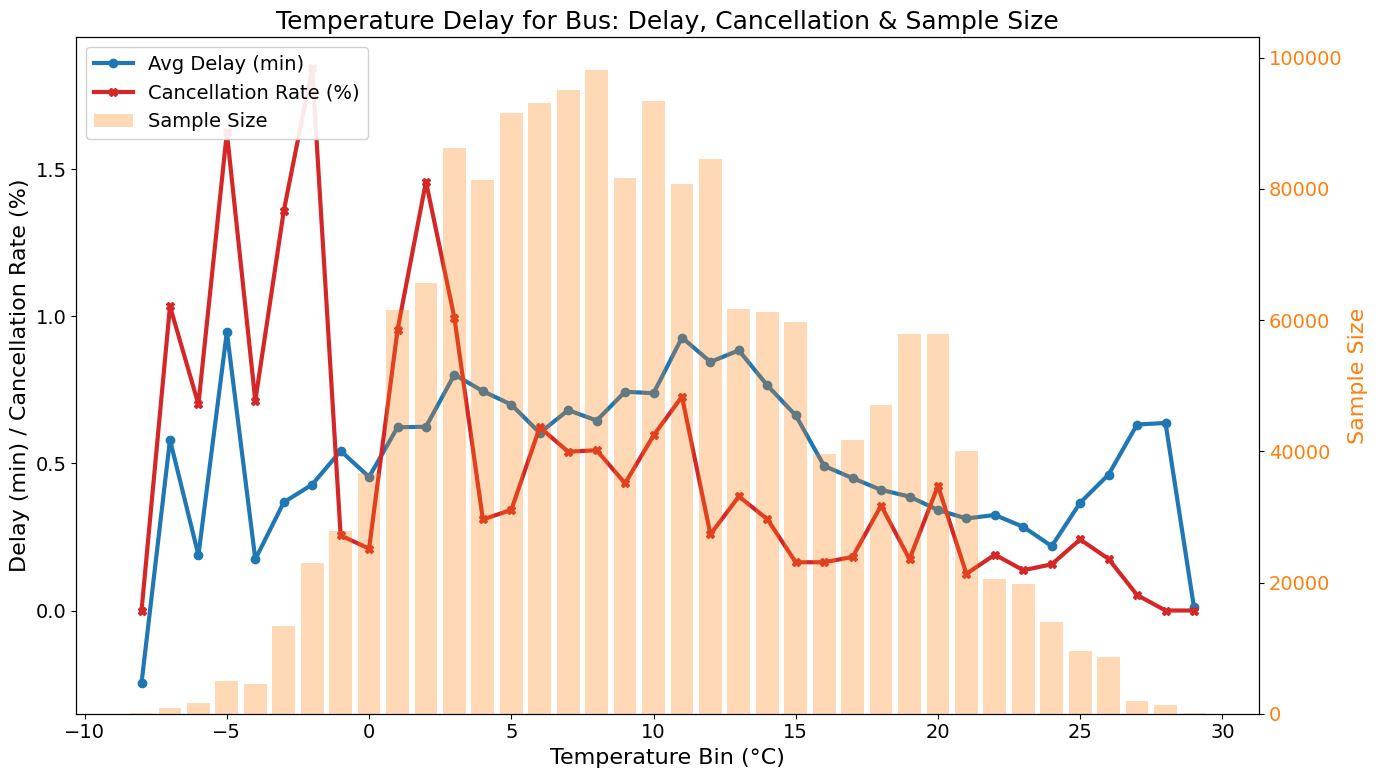

In [108]:
# for top 5 train types, plot the temperature delays
top_5_types = train_type['train_type'].tolist()

for t_type in top_5_types:
    subset = temperature_delay_by_train_type[temperature_delay_by_train_type['train_type'] == t_type]
    if not subset.empty:
        plot_metrics(subset, 'temp_bin', f'Temperature Delay for {t_type}', is_categorical=False, x_label='Temperature Bin (°C)', file_name=f'temperature_delay_types/{t_type.lower().replace(" ", "_")}.png')
